In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

1. Plot X vs Y. Do they look related?

Text(0, 0.5, 'Wing Length (cm)')

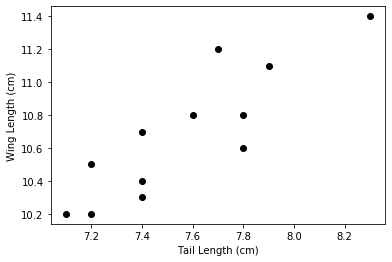

In [2]:
# Always run this cell to load the data
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2 ,7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

# Plot the data
plt.plot(tail_length, wing_length, 'ko')
plt.xlabel('Tail Length (cm)')
plt.ylabel('Wing Length (cm)')

2. Calculate  𝑟𝑋,𝑌  and  𝑟𝑌,𝑋 , first using the equations above and then using either the Python numpy funciton corrcoef or Matlab's built-in corrcoef. Did you get the same answers?

In [19]:
### Calculate r(X,Y) and r(Y,X) using equations above

# Calculate sample means of each group
x_bar = np.mean(tail_length)
y_bar = np.mean(wing_length)

# r = [sum(x_i-x_bar)(y_i-y_bar)] / [sum(x_i-x_bar)^2*sum(y_i-y_bar)]^2

X = np.asarray(tail_length) # Convert lists of data to np arrays
Y = np.asarray(wing_length)
x_bar_array = np.full(X.shape,x_bar)
y_bar_array = np.full(Y.shape,y_bar)

r_XY_num = np.sum((X-x_bar_array)*(Y-y_bar_array))
r_XY_den = (np.sum(np.square(X-x_bar_array)))**0.5*(np.sum(np.square(Y-y_bar_array)))**0.5
r_XY = r_XY_num/r_XY_den

print('Manual Calculation:')
print('rXY =', r_XY)
print('rYX =', r_XY)
print()

### Calculate r(X,Y) and r(Y,X) using built-in fxns

r_XY_np = np.corrcoef(X,Y)
r_YX_np = np.corrcoef(Y,X)

print('Built-in Functions:')
print('rXY =', r_XY_np[1,0])
print('rYX =', r_YX_np[1,0])

Manual Calculation:
rXY = 0.8703545613058227
rYX = 0.8703545613058227

Built-in Functions:
rXY = 0.8703545613058227
rYX = 0.8703545613058227


3. What is the standard error of  𝑟𝑋,𝑌 ? The 95% confidence intervals computed from the standard error?

In [24]:
### Standard error of rXY

# s_r = sqrt((1-r^2)/(n-2))

s_r = ((1-r_XY**2)/(X.shape[0]-2))**0.5
print('s_r =', s_r)

### 95% CIs

alpha = 0.05

z = 0.5*np.log((1+r_XY)/(1-r_XY))
s_z = (1/(X.shape[0]-3))**0.5
z_CIs = (z+st.norm.ppf(alpha/2)*s_z,z-st.norm.ppf(alpha/2)*s_z)
r_CIs = (( (np.exp(2*z_CIs[0]-1))/(np.exp(2*z_CIs[0]+1)) ) , ((np.exp(2*z_CIs[1]-1))/(np.exp(2*z_CIs[1]+1))))
print(r_CIs)
          

s_r = 0.15571863652567375
(0.681218655407116, 1.9878613117671522)
(0.1353352832366127, 0.13533528323661267)


4. Should the value of  𝑟𝑋,𝑌  be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for  𝐻0:𝑟𝑋,𝑌=0 ?

In [29]:
# Calculate t-value for r on the null distribution

t = r_XY/s_r
p = (1-st.t.cdf(t,(X.shape[0]-2)))*2

print('p = ', p)

p =  0.00023110594312059085


5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate  𝐻0:𝑟=0.75 .

In [31]:
H_0 = 0.75
z_yale = 0.5*np.log((1+H_0)/(1-H_0))

lam = (z-z_yale)/(1/(X.shape[0]-3)**0.5)

p_yale = 2*(1-st.norm.cdf(lam))

print('p = ', p_yale)

p =  0.2780303018608832


6. Finally, calculate the statistical power and sample size needed to reject  𝐻0:𝑟=0𝑤ℎ𝑒𝑛𝑟≥0.5 .

In [32]:
r_6 = 0.5
z_6 = 0.5*np.log((1+r_6)/(1-r_6))
lam_6 = (z-z_6)/(1/(X.shape[0]-3)**0.5)

alpha_6 = 0.05
z_val = st.norm.ppf(1-alpha_6/2)

power_6 = 1-st.norm.cdf(z_val-lam_6)

print('Power =',power_6)

0.6538506681771875
